**Step1: Install and Import Dependencies**

In [1]:
#to access kaggle datasets
!pip install kaggle
#Math operations
!pip install numpy==1.15.0
#Machine Learning
!pip install catboost

In [0]:
#data preprocessing
import pandas as pd
#math operations
import numpy as np
#machine learning
from catboost import CatBoostRegressor, Pool
#data scaling
from sklearn.preprocessing import StandardScaler
#hyperparameter optimisation
from sklearn.model_selection import GridSearchCV
#support vector machine model
from sklearn.svm import NuSVR,SVR
#kernel ridge
from sklearn.kernel_ridge import KernelRidge
#visualisation
import matplotlib.pyplot as plt

**Step2:Import Dataset from Kaggle**

In [2]:
#Colab's file access feature
from google.colab import files
#retrieve uploaded file
uploaded = files.upload()
#move kaggle.json into the file where the api expects it to be there
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
#kaggle competition list
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2518           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      10183           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4145           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         35           False  
competitive-data-science-predict-future-sales  2019-12-31 23:59:00  Playground           Kudos       2417           False  
two-sigma-financial-news                       2019-07-15 23:59:00  Featured          $100,000       2927           False  
LANL-Ear

In [4]:
#download earthquake data
!kaggle competitions download -c LANL-Earthquake-Prediction

  0% 0.00/33.3k [00:00<?, ?B/s]
100% 33.3k/33.3k [00:00<00:00, 28.3MB/s]
 98% 238M/242M [00:01<00:00, 142MB/s]
100% 242M/242M [00:01<00:00, 139MB/s]
100% 2.03G/2.03G [00:37<00:00, 9.94MB/s]



In [5]:
#unzipping training data
!unzip train.csv.zip
!ls


Archive:  train.csv.zip
  inflating: train.csv               
sample_data  sample_submission.csv  test.zip  train.csv  train.csv.zip


In [24]:
!unzip test.zip -d test_data
!ls

Archive:  test.zip
  inflating: test_data/seg_430e66.csv  
  inflating: test_data/seg_d1a281.csv  
  inflating: test_data/seg_05a1b0.csv  
  inflating: test_data/seg_f8dd7e.csv  
  inflating: test_data/seg_b9bdd7.csv  
  inflating: test_data/seg_24c1c9.csv  
  inflating: test_data/seg_c5abaa.csv  
  inflating: test_data/seg_6262c4.csv  
  inflating: test_data/seg_734a88.csv  
  inflating: test_data/seg_94a133.csv  
  inflating: test_data/seg_d0c280.csv  
  inflating: test_data/seg_d36737.csv  
  inflating: test_data/seg_f80e44.csv  
  inflating: test_data/seg_07c815.csv  
  inflating: test_data/seg_7c9433.csv  
  inflating: test_data/seg_211486.csv  
  inflating: test_data/seg_78ded2.csv  
  inflating: test_data/seg_f11f77.csv  
  inflating: test_data/seg_b3883e.csv  
  inflating: test_data/seg_3db0a8.csv  
  inflating: test_data/seg_81f798.csv  
  inflating: test_data/seg_0a45a1.csv  
  inflating: test_data/seg_dc188b.csv  
  inflating: test_data/seg_4a9e8d.csv  
  inflating: test_dat

seg_id,time_to_failure
seg_00030f,0
seg_0012b5,0
seg_00184e,0
seg_003339,0
seg_0042cc,0
seg_004314,0
seg_004cd2,0
seg_004ee5,0
seg_004f1f,0
seg_00648a,0
seg_006e4a,0
seg_007a37,0
seg_00a37e,0
seg_00be11,0
seg_00c35b,0
seg_00cc91,0
seg_00e5f7,0
seg_00f3b9,0
seg_010eab,0
seg_0125d9,0
seg_0144cb,0
seg_0165c6,0
seg_016913,0
seg_016cdb,0
seg_017314,0
seg_01a8dc,0
seg_01c775,0
seg_01ecb0,0
seg_02042f,0
seg_025e78,0
seg_032822,0
seg_0339ca,0
seg_037461,0
seg_038879,0
seg_03d386,0
seg_03d63e,0
seg_03d680,0
seg_03f380,0
seg_0445d7,0
seg_046c28,0
seg_0488a1,0
seg_049957,0
seg_04a696,0
seg_04ae38,0
seg_04b87a,0
seg_04cceb,0
seg_04ee93,0
seg_04fd93,0
seg_0536c9,0
seg_055127,0
seg_05a1b0,0
seg_05a4ad,0
seg_05b66a,0
seg_05bef4,0
seg_05e0d7,0
seg_05f126,0
seg_05f9d6,0
seg_060ce4,0
seg_061a33,0
seg_0620e6,0
seg_063865,0
seg_065588,0
seg_06893f,0
seg_06b8c9,0
seg_06bbc5,0
seg_06d4a2,0
seg_06d7ba,0
seg_070bb0,0
seg_071067,0
seg_073696,0
seg_075340,0
seg_075f77,0
seg_0775a7,0
seg_077b7e,0
seg_079e34,0
se

**Step3: Exploratory Data Analysis**

In [0]:
#Extract training data into a dataframe for further manipulation
train = pd.read_csv('train.csv', nrows=6000000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

In [9]:
#print first 10 entries
train.head(10)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691
5,8,1.4691
6,9,1.4691
7,7,1.4691
8,-5,1.4691
9,3,1.4691


NameError: ignored

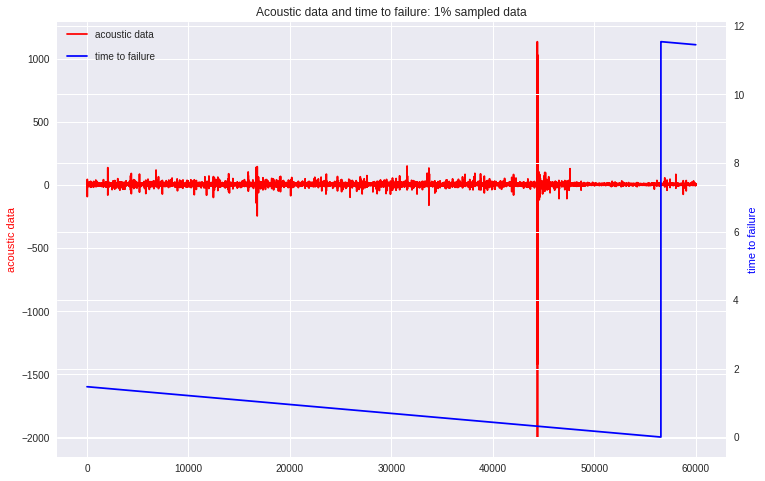

In [10]:
#visualize 1% of samples data, first 100 datapoints
train_ad_sample_df = train['acoustic_data'].values[::100]
train_ttf_sample_df = train['time_to_failure'].values[::100]

#function for plotting based on both features
def plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, title="Acoustic data and time to failure: 1% sampled data"):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    plt.title(title)
    plt.plot(train_ad_sample_df, color='r')
    ax1.set_ylabel('acoustic data', color='r')
    plt.legend(['acoustic data'], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.plot(train_ttf_sample_df, color='b')
    ax2.set_ylabel('time to failure', color='b')
    plt.legend(['time to failure'], loc=(0.01, 0.9))
    plt.grid(True)

plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df)
del train_ad_sample_df
del train_ttf_sample_df


**Step4: Feature Engineering**

In [0]:
#lets create a function to generate some statistical features based on the training data
def gen_features(X):
    strain = []
    strain.append(X.mean())
    strain.append(X.std())
    strain.append(X.min())
    strain.append(X.max())
    strain.append(X.kurtosis())
    strain.append(X.skew())
    strain.append(np.quantile(X,0.01))
    strain.append(np.quantile(X,0.05))
    strain.append(np.quantile(X,0.95))
    strain.append(np.quantile(X,0.99))
    strain.append(np.abs(X).max())
    strain.append(np.abs(X).mean())
    strain.append(np.abs(X).std())
    return pd.Series(strain)

In [0]:
train = pd.read_csv('train.csv', iterator=True, chunksize=150_000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

X_train = pd.DataFrame()
y_train = pd.Series()
for df in train:
    ch = gen_features(df['acoustic_data'])
    X_train = X_train.append(ch, ignore_index=True)
    y_train = y_train.append(pd.Series(df['time_to_failure'].values[-1]))

In [13]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000
mean,4.519475,6.547788,-149.190942,163.522288,68.297997,0.125830,-11.224603,-2.184779,11.231716,20.321890,170.046246,5.547367,5.750165
std,0.256049,8.503939,265.087984,272.930331,70.532565,0.477901,14.106852,2.346558,2.358067,14.225526,296.887015,1.517038,8.339211
min,3.596313,2.802720,-5515.000000,23.000000,0.648602,-4.091826,-336.000000,-39.000000,9.000000,11.000000,23.000000,4.147707,2.589085
25%,4.349497,4.478637,-154.000000,92.000000,28.090227,-0.040779,-14.000000,-3.000000,10.000000,15.000000,94.000000,5.061843,3.862810
50%,4.522147,5.618798,-111.000000,123.000000,45.816625,0.085620,-10.000000,-2.000000,11.000000,19.000000,127.000000,5.380853,4.781513
75%,4.693350,6.880904,-79.000000,170.000000,78.664202,0.253930,-6.000000,-1.000000,12.000000,23.000000,175.000000,5.748553,5.887947
max,5.391993,153.703569,-15.000000,5444.000000,631.158927,4.219429,-2.000000,0.000000,50.000000,337.000000,5515.000000,32.762073,150.432368


**Step5: Implementing Catboost Model**

In [14]:
train_pool = Pool(X_train, y_train)
m = CatBoostRegressor(iterations=10000, loss_function='MAE', boosting_type='Ordered')
m.fit(X_train, y_train, silent=True)
m.best_score_
y_pred = m.predict(X_test)

{'learn': {'MAE': 1.7804224713035586}}

**Step 6 - Implement Support Vector Machine + Radial Basis Function Kernel**

In [15]:
#Model #2 - Support Vector Machine w/ RBF + Grid Search
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
parameters = [{'gamma': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1],
               'C': [0.1, 0.2, 0.25, 0.5, 1, 1.5, 2]}]
reg1 = GridSearchCV(SVR(kernel='rbf', tol=0.01), parameters, cv=5, scoring='neg_mean_absolute_error')
reg1.fit(X_train_scaled, y_train.values.flatten())
y_pred1 = reg1.predict(X_train_scaled)

print("Best CV score: {:.4f}".format(reg1.best_score_))
print(reg1.best_params_)

Best CV score: -2.1722
{'C': 2, 'gamma': 0.02}


In [16]:
y_pred = m.predict(X_test)

NameError: ignored